In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/MBTA_2024_System-Wide_Passenger_Survey.csv")
df.drop_duplicates(inplace=True)

print(df.shape)
df.head()


(13866, 8)


,aggregation_level,service_mode,reporting_group,measure_group,measure,category,weighted_percent,ObjectId
0,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,Drive or Ride in a Carpool,0.316855,1
1,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,"Bike, Scooter, or Other Micromobility",0.000000,2
2,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,Private Shuttle or Other Transit,0.000000,3
3,Reporting Group,Bus,10,Alternative Modes,Alternative Mode,Other,0.000000,4
4,Reporting Group,Bus,10,Alternative Modes,Used Alternative Mode,No,0.837547,5


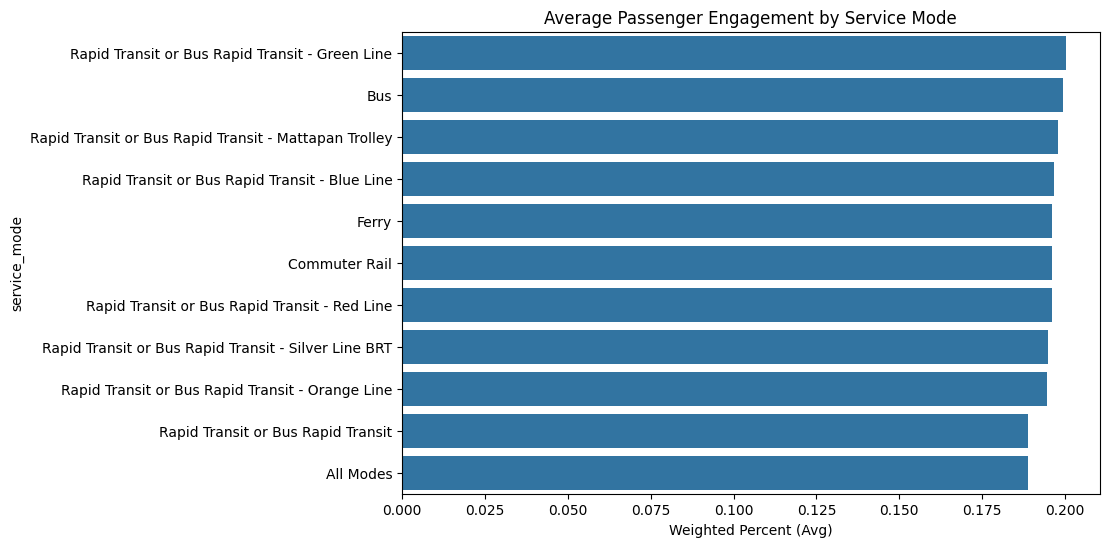

In [20]:
#nsight: Which services have highest engagement?
mode_usage = df.groupby("service_mode")["weighted_percent"].mean().sort_values(ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(x=mode_usage.values, y=mode_usage.index)
plt.title("Average Passenger Engagement by Service Mode")
plt.xlabel("Weighted Percent (Avg)")
plt.show()


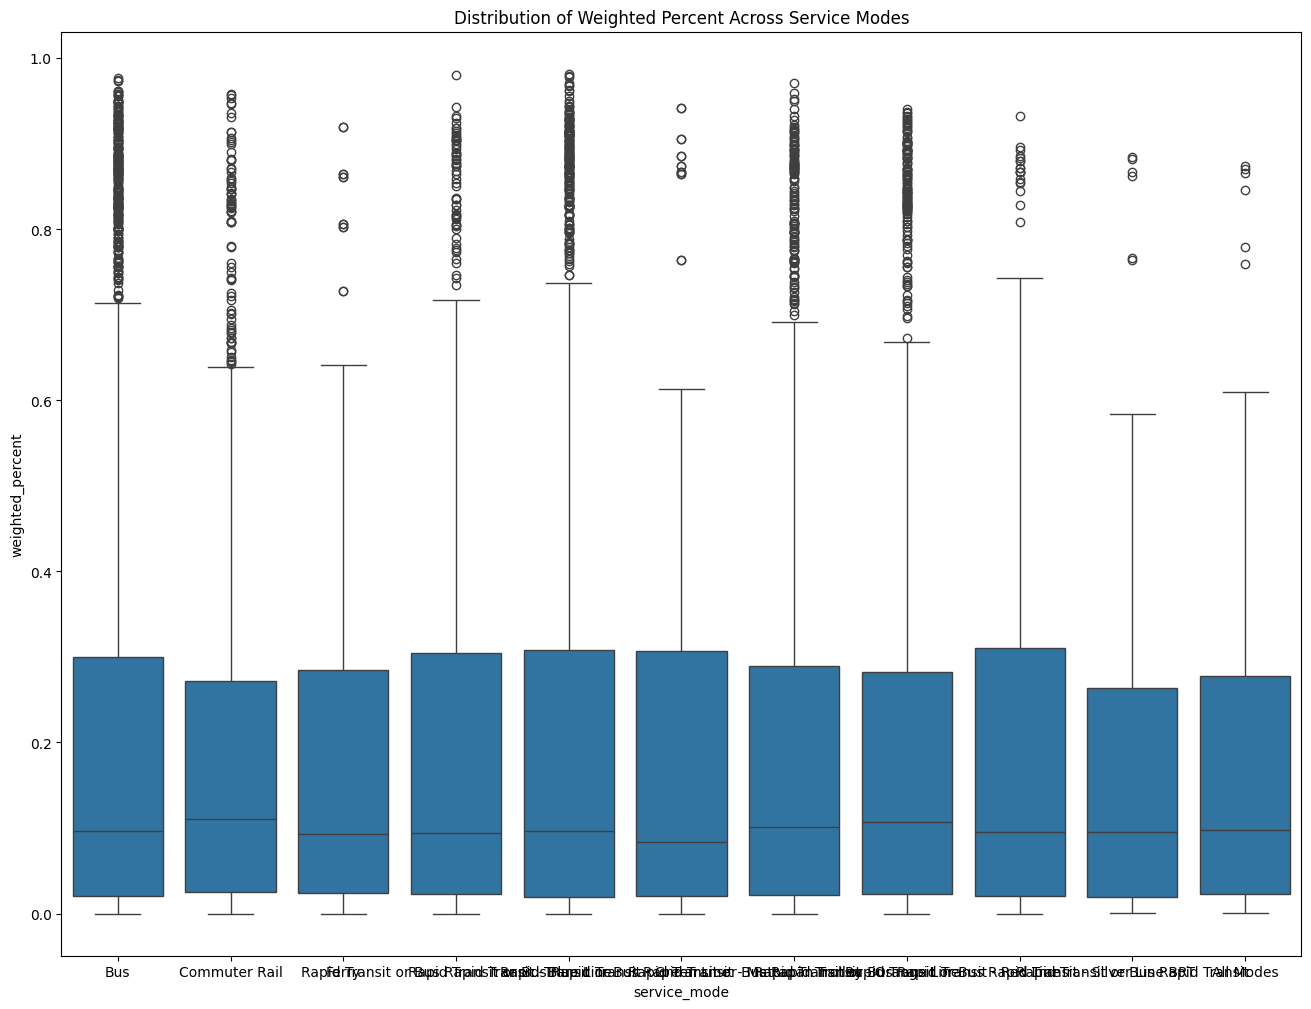

In [21]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df, x="service_mode", y="weighted_percent")
plt.title("Distribution of Weighted Percent Across Service Modes")
plt.show()


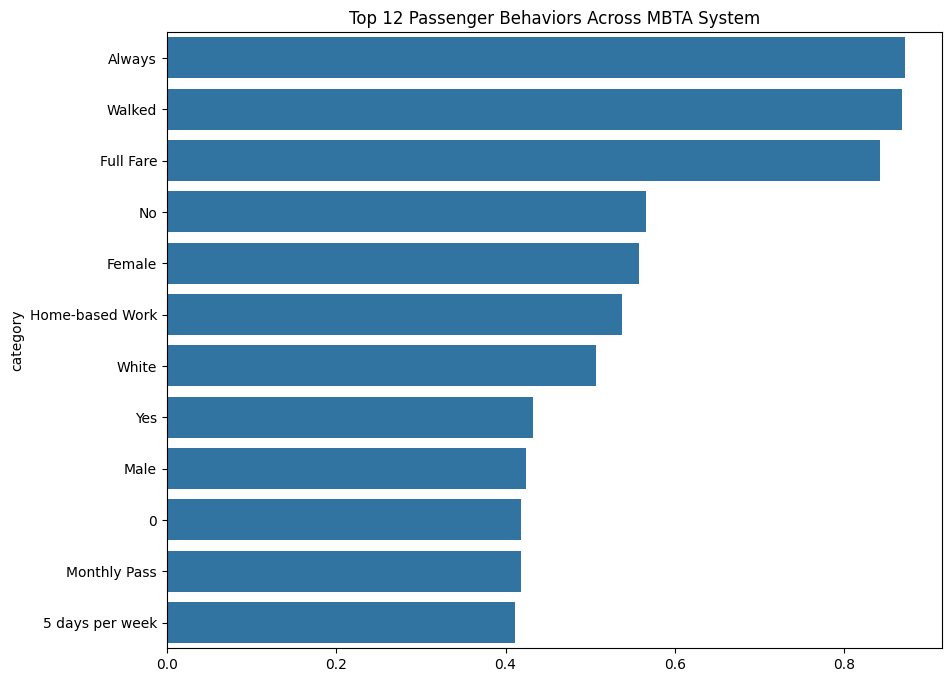

In [22]:
top_behaviors = df.groupby("category")["weighted_percent"].mean().sort_values(ascending=False).head(12)

plt.figure(figsize=(10,8))
sns.barplot(x=top_behaviors.values, y=top_behaviors.index)
plt.title("Top 12 Passenger Behaviors Across MBTA System")
plt.show()

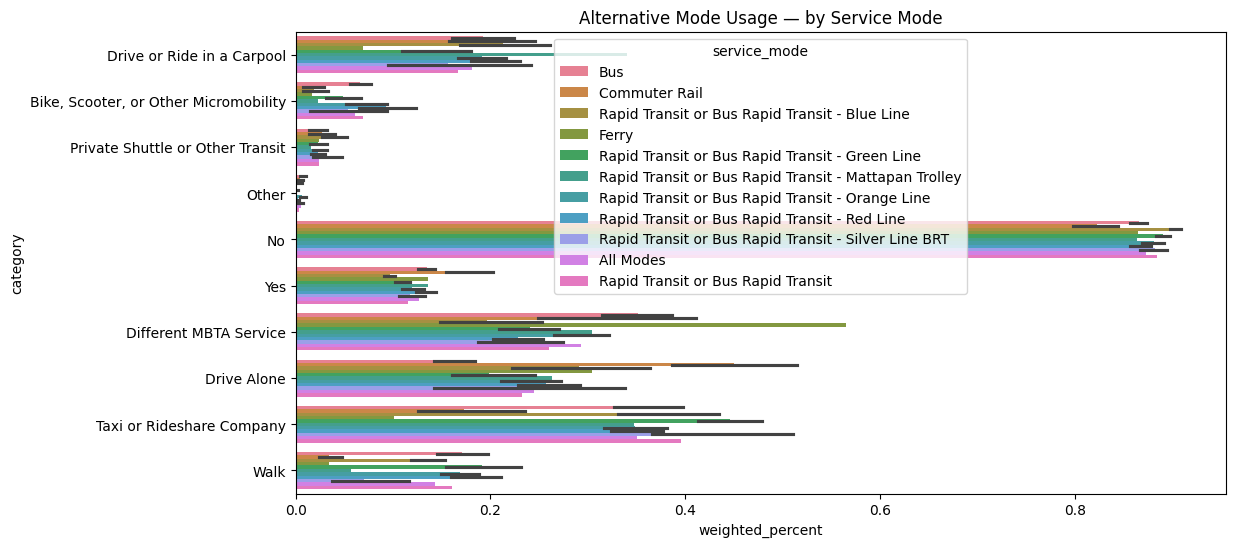

In [23]:
alt = df[df["measure_group"] == "Alternative Modes"]

plt.figure(figsize=(12,6))
sns.barplot(data=alt, x="weighted_percent", y="category",
            hue="service_mode")
plt.title("Alternative Mode Usage — by Service Mode")
plt.show()

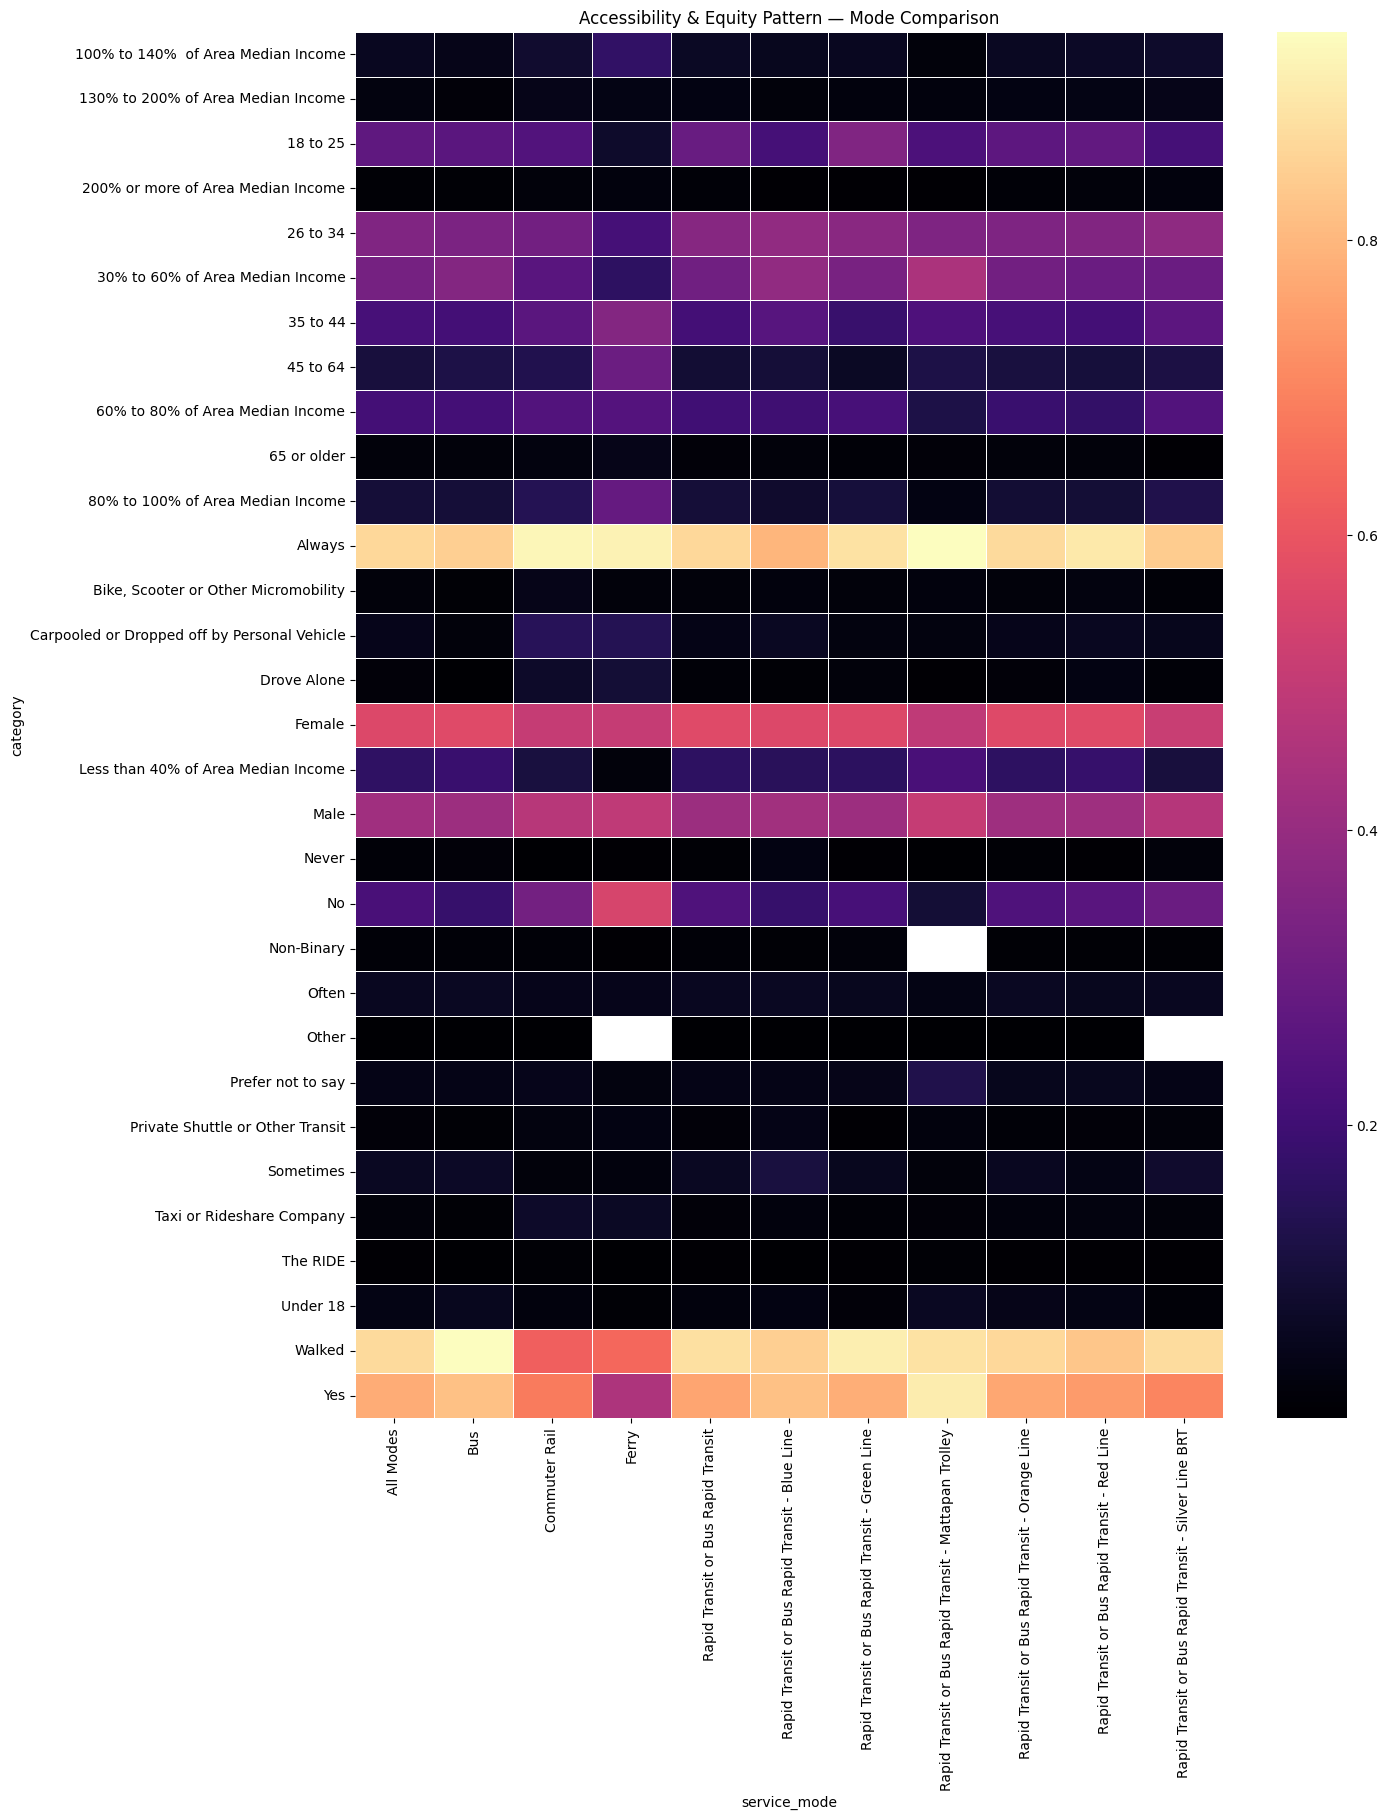

In [24]:
equity_df = df[df["measure_group"].str.contains("Access|Income|Demographic", case=False, na=False)]

heat = equity_df.pivot_table(values="weighted_percent",
                             index="category",
                             columns="service_mode",
                             aggfunc="mean")

plt.figure(figsize=(14,18))
sns.heatmap(heat, cmap="magma", linewidth=.5)
plt.title("Accessibility & Equity Pattern — Mode Comparison")
plt.show()


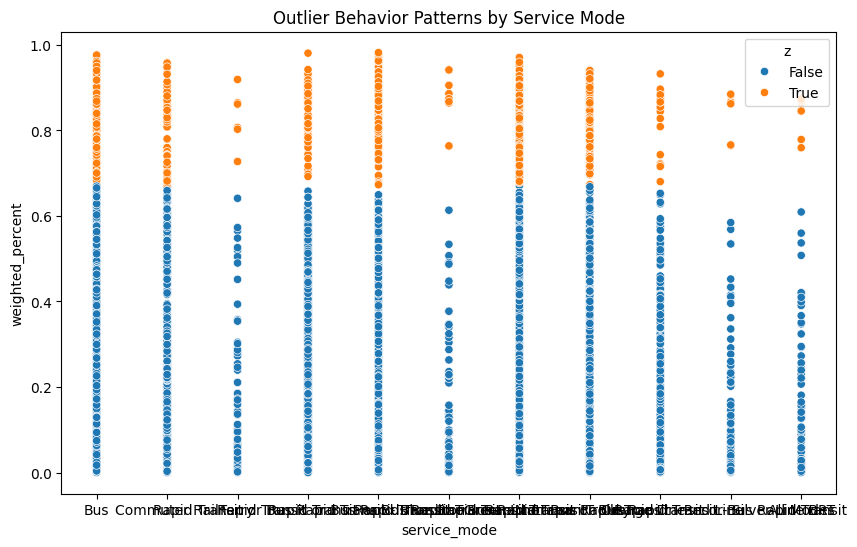

,aggregation_level,service_mode,reporting_group,measure_group,measure,category,weighted_percent,ObjectId,z
4,Reporting Group,Bus,10,Alternative Modes,Used Alternative Mode,No,0.837547,5,2.703068
11,Reporting Group,Bus,10,Fares,Reduced Fares,Full Fare,0.831980,12,2.679547
25,Reporting Group,Bus,10,Income,Title VI Low-Income,Yes,0.756001,26,2.358578
27,Reporting Group,Bus,10,Other Demographics,Ability to Understand English,Always,0.920110,28,3.051851
41,Reporting Group,Bus,10,Race and Ethnicity,Hispanic or Latine,No,0.875207,42,2.862159
50,Reporting Group,Bus,1,Access Mode,Access to First MBTA Service,Walked,0.947642,51,3.168161
65,Reporting Group,Bus,1,Alternative Modes,Used Alternative Mode,No,0.842352,66,2.723366
74,Reporting Group,Bus,1,Fares,Reduced Fares,Full Fare,0.829828,75,2.670456
89,Reporting Group,Bus,1,Income,Title VI Low-Income,Yes,0.825452,90,2.651973
91,Reporting Group,Bus,1,Other Demographics,Ability to Understand English,Always,0.886391,92,2.909407


In [25]:
from scipy.stats import zscore
df["z"] = zscore(df["weighted_percent"])
outliers = df[df["z"] > 2]  # Extreme positives

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="service_mode", y="weighted_percent", hue=df["z"]>2)
plt.title("Outlier Behavior Patterns by Service Mode")
plt.show()

outliers.head(10)


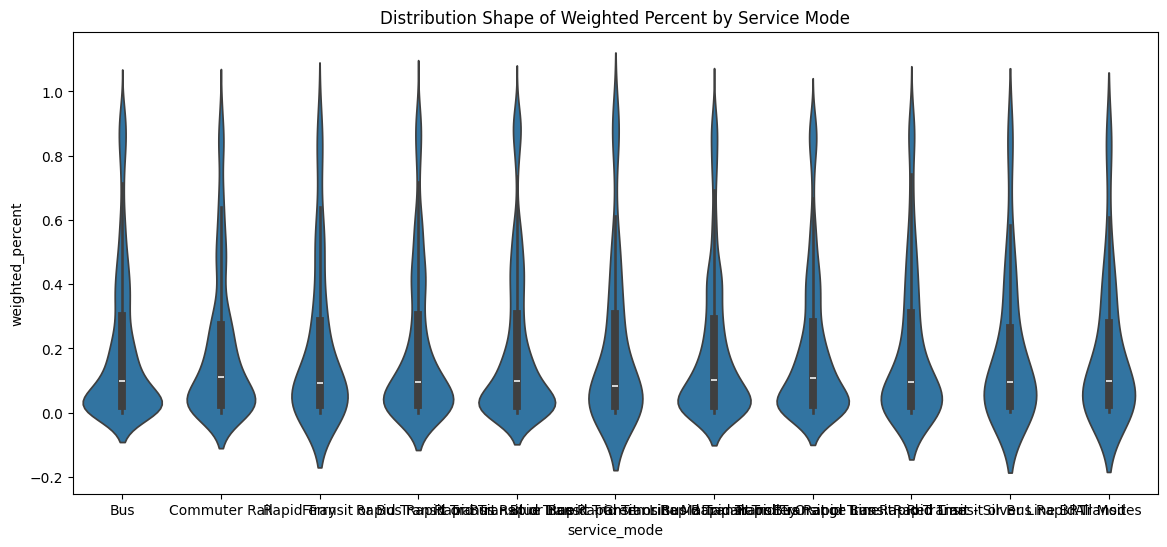

In [26]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x="service_mode", y="weighted_percent")
plt.title("Distribution Shape of Weighted Percent by Service Mode")
plt.show()


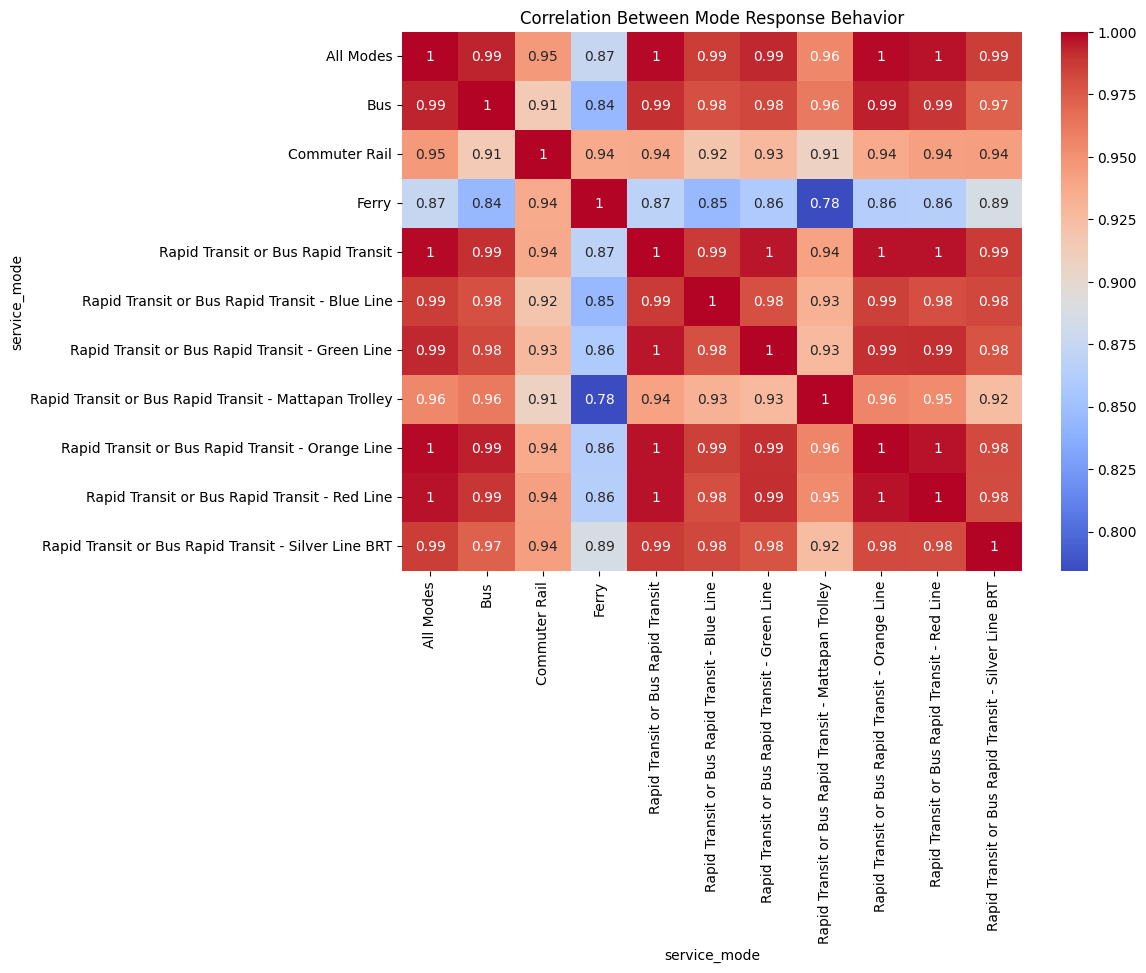

In [27]:
pivot = df.pivot_table(values="weighted_percent",
                       index="category",
                       columns="service_mode",
                       aggfunc="mean")

plt.figure(figsize=(10,7))
sns.heatmap(pivot.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Mode Response Behavior")
plt.show()
